# Predicting heart disease using machine learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

We're going to take the following approach:

1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition
In a statement,
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data
The original data came from the Cleavland data from the UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/heart+Disease

There is also a version of it available on Kaggle. https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset

## 3. Evaluation
> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4. Features
This is where you'll get different information about each of the features in your data. You can do this via doing your own research (such as looking at the links above) or by talking to a subject matter expert (someone who knows about the dataset).

**Create data dictionary**
1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

## Preparing the tools 
We're gonna use Pandas, NumPy and Matplotlib for data analysis and manipulation.

In [29]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline 

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

In [2]:
df = pd.read_csv("heart-disease.csv")
df.shape

(303, 14)

## Data Exploration (exploratory data analysis or EDA)
The goal here is to find out more about the data and become a subject matter export on the dataset you're working with.

1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# balance or imbalance classification problem
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

<Axes: >

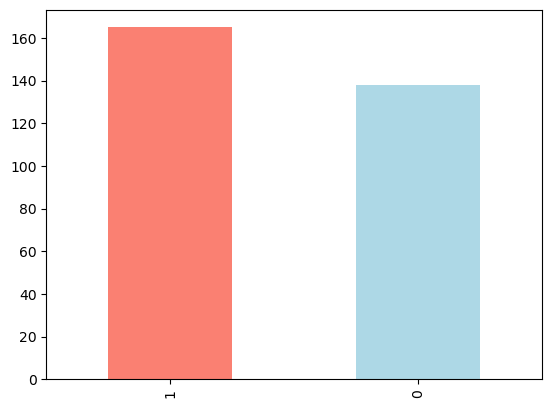

In [5]:
df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
# check if there are missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [10]:
# Compare target column to sex
pd.crosstab(df.sex, df.target)

target,0,1
sex,,
0,24,72
1,114,93


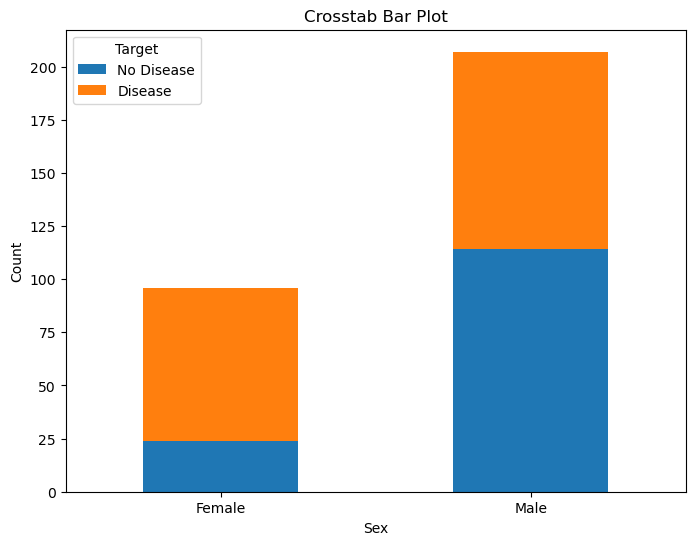

In [11]:
# Map the sex values to 'Male' and 'Female'
sex_mapping = {1: 'Male', 0: 'Female'}
df['sex'] = df['sex'].map(sex_mapping)

# Create a crosstab
crosstab = pd.crosstab(df['sex'], df['target'])

# Plot the crosstab as a bar plot
ax = crosstab.plot(kind='bar', stacked=True, figsize=(8, 6))

# Rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Add labels and title
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Crosstab Bar Plot')

# Customize legend
handles, labels = ax.get_legend_handles_labels()
labels = ['No Disease', 'Disease']
ax.legend(handles, labels, title='Target')

# Show the plot
plt.show()

### Age vs. Max Heart Rate for Heart Disease

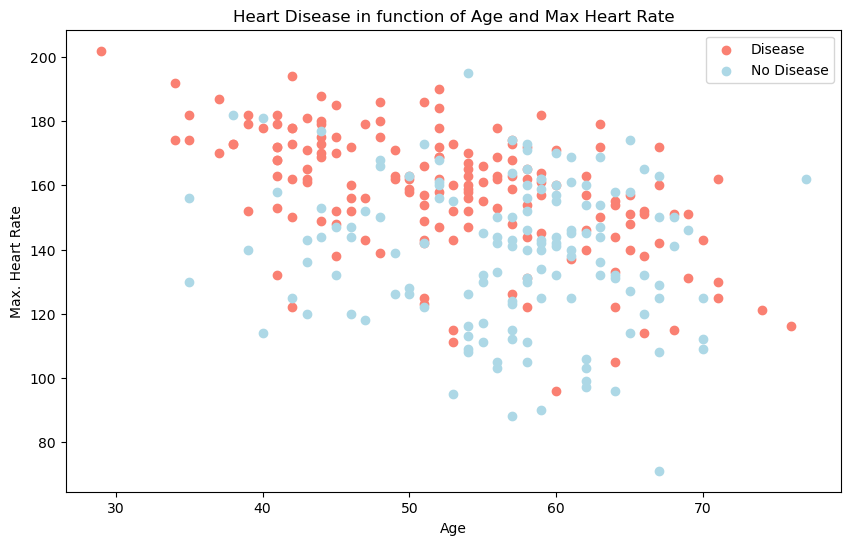

In [12]:
# Create a new figure
plt.figure(figsize=(10,6))

# Scatter with positive examples
plt.scatter(x=df.age[df.target==1], y=df.thalach[df.target==1], c="salmon");

# Scatter with negative examples
plt.scatter(x=df.age[df.target==0], y=df.thalach[df.target==0], c="lightblue");

plt.xlabel("Age")
plt.ylabel("Max. Heart Rate")
plt.title('Heart Disease in function of Age and Max Heart Rate')
plt.legend(["Disease", "No Disease"]);

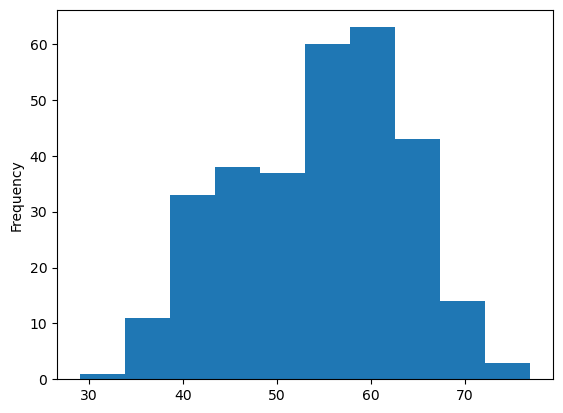

In [13]:
# Check the distribution of the age column with a histogram
df.age.plot.hist();

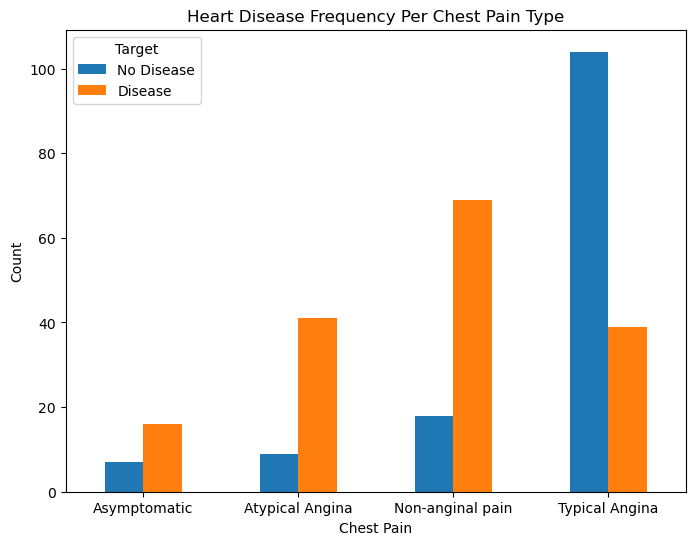

In [14]:
df = pd.read_csv("heart-disease.csv")

# Map the sex values to 'Male' and 'Female'
cp_mapping = {0: 'Typical Angina', 1: 'Atypical Angina', 2: 'Non-anginal pain' , 3: 'Asymptomatic'}
df['cp'] = df['cp'].map(cp_mapping)

# Create a crosstab
crosstab = pd.crosstab(df['cp'], df['target'])

# Plot the crosstab as a bar plot
ax = crosstab.plot(kind='bar', stacked=False, figsize=(8, 6))

# Rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Add labels and title
plt.xlabel('Chest Pain')
plt.ylabel('Count')
plt.title('Heart Disease Frequency Per Chest Pain Type')

# Customize legend
handles, labels = ax.get_legend_handles_labels()
labels = ['No Disease', 'Disease']
ax.legend(handles, labels, title='Target')

# Show the plot
plt.show()

In [15]:
pd.crosstab(df['cp'], df['target'])

target,0,1
cp,,
Asymptomatic,7,16
Atypical Angina,9,41
Non-anginal pain,18,69
Typical Angina,104,39


In [16]:
# Make a correlation matrix
df.corr()

C:\Users\Mark Maksi\AppData\Local\Temp\ipykernel_2552\1478283149.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
trestbps,0.279351,-0.056769,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696
slope,-0.168814,-0.030711,-0.121475,-0.004038,-0.059894,0.093045,0.386784,-0.257748,-0.577537,1.000000,-0.080155,-0.104764,0.345877


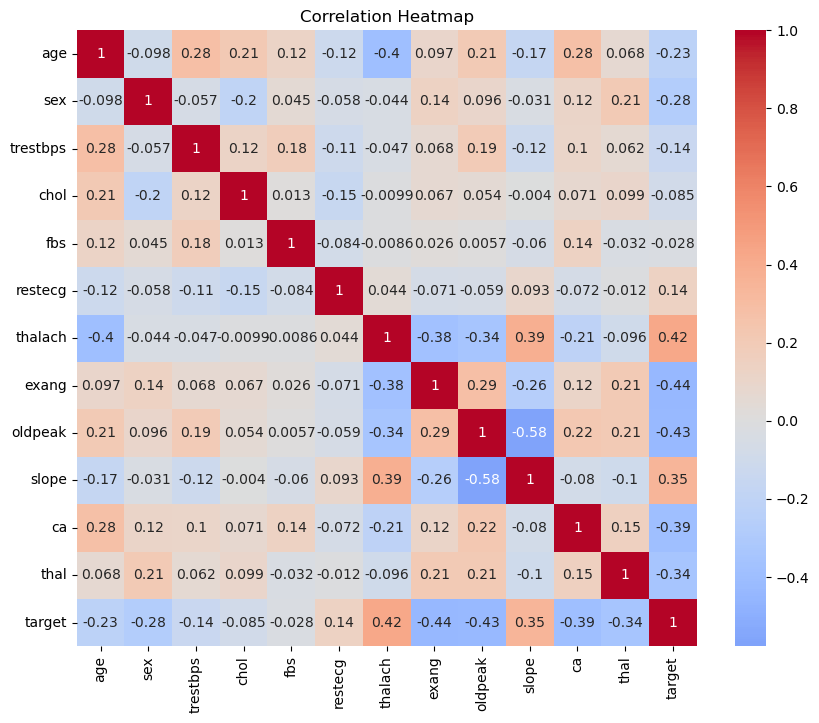

In [17]:
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")
plt.show()

## 5. Modeling

In [18]:
df = pd.read_csv("heart-disease.csv")

# Split data into X and y
X = df.drop("target", axis=1)
y = df["target"]

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [20]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

D:\machine-learning\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

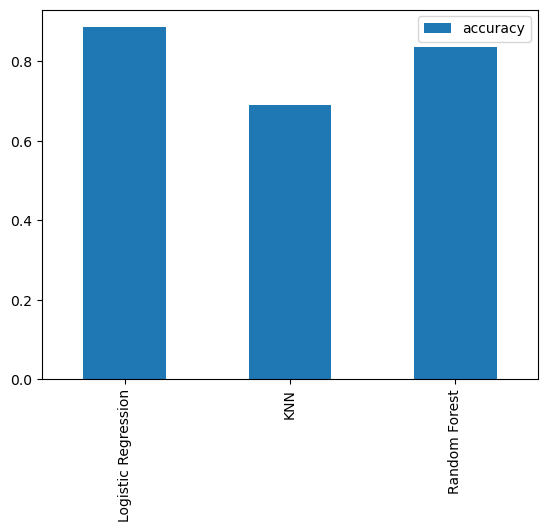

In [21]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

## Hyperparameter tuning with GridSearchCV

## Hyperparameter tuning with RandomizedSearchCV

In [22]:
# Define LogisticRegression classifier
logreg = LogisticRegression()
rf_classifier = RandomForestClassifier()

# Define hyperparameter distribution
lg_grid = {
    'C': np.logspace(-4, 4, 20),  # Inverse of regularization strength
    'solver': ['liblinear'],
    'max_iter': np.arange(1000)  # Maximum number of iterations
}

rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

np.random.seed(42)

# Perform Randomized Search
rs_log_reg = RandomizedSearchCV(logreg, param_distributions=lg_grid, n_iter=10, cv=5, scoring='accuracy', random_state=42)
rs_log_reg.fit(X_train, y_train)

rs_rf = RandomizedSearchCV(rf_classifier, param_distributions=rf_grid, n_iter=10, cv=5, scoring='accuracy', random_state=42)
rs_rf.fit(X_train, y_train)

# Print best hyperparameters and score
print("Best Hyperparameters for Logistic Regression Classifier:", rs_log_reg.best_params_)
print("Best Score for Logistic Regression Classifier:", rs_log_reg.best_score_)

print("Best Hyperparameters for Random Forest Classifier:", rs_rf.best_params_)
print("Best Score for Random Forest Classifier:", rs_rf.best_score_)

Best Hyperparameters for Logistic Regression Classifier: {'solver': 'liblinear', 'max_iter': 964, 'C': 4.281332398719396}
Best Score for Logistic Regression Classifier: 0.8181122448979592
Best Hyperparameters for Random Forest Classifier: {'n_estimators': 10, 'min_samples_split': 16, 'min_samples_leaf': 9, 'max_depth': None}
Best Score for Random Forest Classifier: 0.8263605442176871


In [23]:
rs_log_reg.score(X_test, y_test)

0.8688524590163934

In [24]:
rs_rf.score(X_test, y_test)

0.8524590163934426

## Evaluating our tuned machine learning classifier beyond accuracy

* AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1 score

.. and it would be great if cross validation was used where possible.

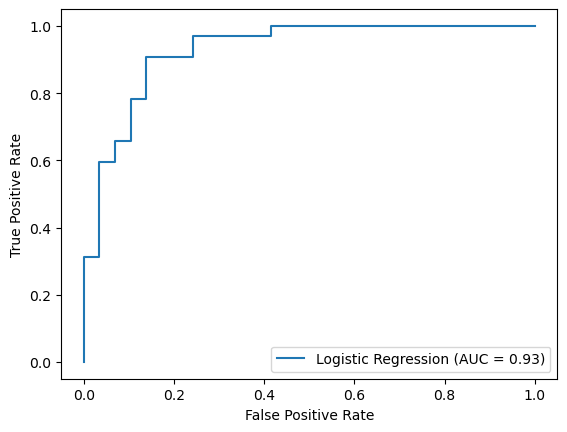

In [25]:
from sklearn.metrics import roc_auc_score, roc_curve

# Make prediction with tuned model
classifier = models["Logistic Regression"]

# Predict probabilities for the positive class
y_pred_prob = classifier.predict_proba(X_test)[:, 1]

# Calculate AUC score
auc_score = roc_auc_score(y_test, y_pred_prob)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Create the RocCurveDisplay object
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc_score, estimator_name='Logistic Regression')

# Plot ROC curve
roc_display.plot()
plt.show()

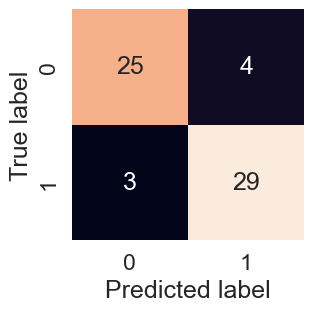

In [26]:
y_preds = classifier.predict(X_test)

# Import Seaborn
import seaborn as sns
sns.set(font_scale=1.5) # Increase font size

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("Predicted label") # predictions go on the x-axis
    plt.ylabel("True label") # true labels go on the y-axis 
    
plot_conf_mat(y_test, y_preds)

In [28]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



Precision: "Out of all the instances that the model predicted as positive, how many are actually positive?"

Recall: "Out of all the instances that are actually positive, how many did the model correctly predict as positive?"

## Calculate evaluation metrics using cross-validation

In [31]:
# Check best hyperparameters
rs_log_reg.best_params_

{'solver': 'liblinear', 'max_iter': 964, 'C': 4.281332398719396}

In [32]:
clf = LogisticRegression(solver='liblinear', C=4.281332398719396, max_iter=964)

In [36]:
# Cross validated accuracy
cv_score = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
cv_score

array([0.81967213, 0.86885246, 0.83606557, 0.86666667, 0.71666667])

In [39]:
cv_acc = np.mean(cv_score)
cv_acc

0.8215846994535518

In [41]:
# Cross validated precision
cv_score = cross_val_score(clf, X, y, cv=5, scoring='precision')
cv_precision = np.mean(cv_score)
cv_precision

0.8179096985548598

In [42]:
# Cross validated recall
cv_score = cross_val_score(clf, X, y, cv=5, scoring='recall')
cv_recall = np.mean(cv_score)
cv_recall

0.8727272727272727

In [43]:
# Cross validated f1
cv_score = cross_val_score(clf, X, y, cv=5, scoring='f1')
cv_f1 = np.mean(cv_score)
cv_f1

0.8429665874032072

In [45]:
cv_metrics = pd.DataFrame({"Accuracy": cv_acc, "Precision": cv_precision, "recall": cv_recall, "f1": cv_f1}, index=[0])
cv_metrics

,Accuracy,Precision,recall,f1
0,0.821585,0.81791,0.872727,0.842967


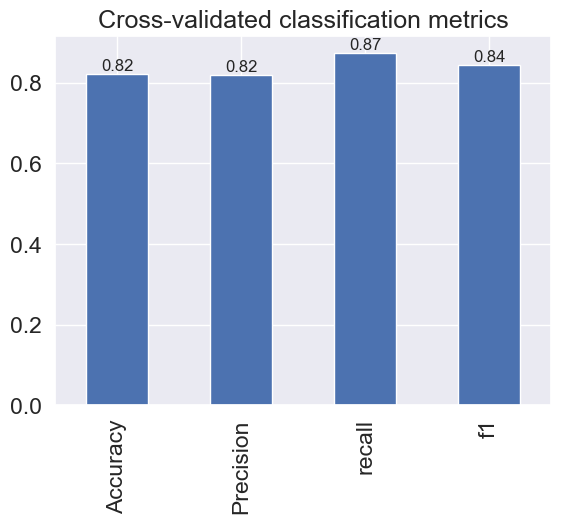

In [58]:
ax = cv_metrics.T.plot.bar(title="Cross-validated classification metrics", legend=False)

# Annotate the bars with their values (with adjusted font size)
for idx, metric in enumerate(cv_metrics.columns):
    for i, value in enumerate(cv_metrics[metric]):
        ax.text(idx, value + 0.01, f"{value:.2f}", ha="center", fontsize=12)  # Adjust fontsize here

plt.show()

## Feature Importance

In [63]:
# Initialize and fit the logistic regression model
logreg_model = LogisticRegression(solver='liblinear', C=4.281332398719396, max_iter=964)
logreg_model.fit(X, y)

# Get the feature coefficients
feature_importance = logreg_model.coef_[0]

# Create a DataFrame to display feature names and their coefficients
coeff_df = pd.DataFrame({"Feature": X.columns, "Coefficient": feature_importance})

# Sort the DataFrame by absolute coefficient values
coeff_df["Absolute Coefficient"] = coeff_df["Coefficient"].abs()
coeff_df = coeff_df.sort_values(by="Absolute Coefficient", ascending=False)

print(coeff_df)

     Feature  Coefficient  Absolute Coefficient
1        sex    -1.598684              1.598684
8      exang    -0.889402              0.889402
12      thal    -0.852348              0.852348
2         cp     0.838358              0.838358
11        ca    -0.759128              0.759128
10     slope     0.572670              0.572670
9    oldpeak    -0.515500              0.515500
6    restecg     0.493285              0.493285
7    thalach     0.028055              0.028055
3   trestbps    -0.016766              0.016766
0        age     0.005521              0.005521
4       chol    -0.003864              0.003864
5        fbs     0.001526              0.001526


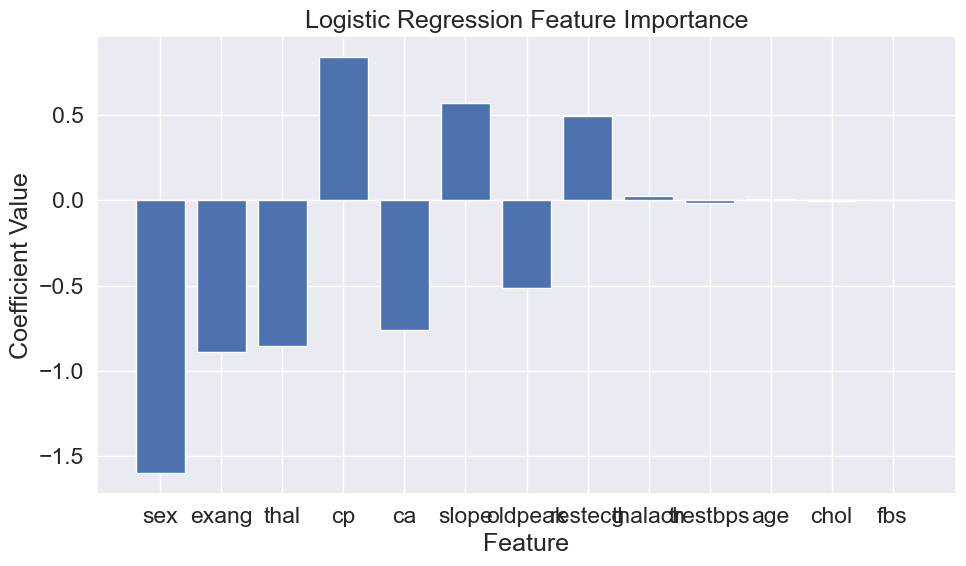

In [85]:
# Create a bar plot to visualize feature importance
plt.figure(figsize=(10, 6))
plt.bar(coeff_df["Feature"], coeff_df["Coefficient"])

# Adjust font size of labels on axes
plt.xlabel("Feature")  # You can adjust the font size here
plt.ylabel("Coefficient Value")  # You can adjust the font size here
plt.title("Logistic Regression Feature Importance")  # You can adjust the font size here
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

In [86]:
pd.crosstab(df['slope'], df['target'])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


slope - the slope of the peak exercise ST segment

* 0: Upsloping: better heart rate with excercise (uncommon)
* 1: Flatsloping: minimal change (typical healthy heart)
* 2: Downslopins: signs of unhealthy heart